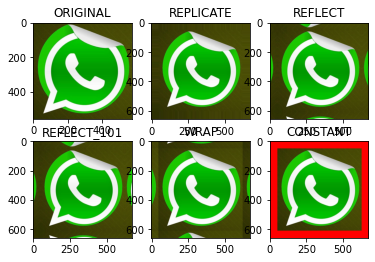

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('whatsapp.jpg')
img2 = cv2.imread('homer.jpg')
replicate = cv2.copyMakeBorder(img1,50,50,50,50,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,50,50,50,50,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,50,50,50,50,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,50,50,50,50,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,50,50,50,50,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

In [26]:
print(np.shape(res))
print(np.shape(img2))

(193, 262, 3)
(193, 262, 3)


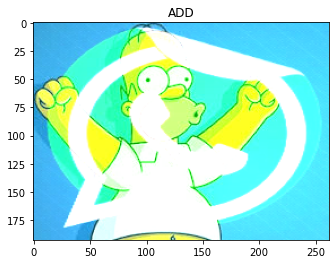

In [50]:
res = cv2.resize(img1, (np.shape(img2)[1],np.shape(img2)[0]))
plt.imshow(cv2.cvtColor(cv2.add(res,img2), cv2.COLOR_BGR2RGB))
plt.title('ADD')
plt.show()

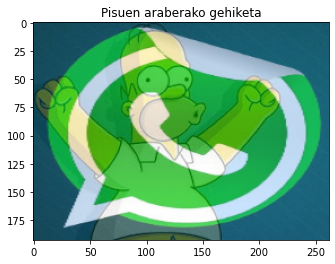

In [51]:
dst = cv2.addWeighted(res,0.7,img2,0.3,0)

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Pisuen araberako gehiketa')
plt.show()

In [43]:
# check if optimization is enabled
cv2.setUseOptimized(True)
cv2.useOptimized()

False

In [44]:
%timeit res = cv2.medianBlur(img1,49)

%timeit res = cv2.medianBlur(img2,49)

3.59 ms ± 40.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.39 ms ± 37.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
imag= cv2.imread('whatsapp.jpg')

e1 = cv2.getTickCount()
for i in range(5,49,2):
    imag = cv2.medianBlur(imag,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print (t)

0.4275061
